In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df = pd.read_csv('labeled.csv', sep=",")

In [9]:
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [10]:
df.shape

(14412, 2)

In [11]:
df['toxic'] = df['toxic'].apply(int)

In [12]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [13]:
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [14]:
for c in df[df['toxic'] == 1]['comment'].head(5):
  print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [15]:
for c in df[df['toxic'] == 0]['comment'].head(5):
  print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [16]:
train_df, test_df = train_test_split(df, test_size=500)

In [17]:
test_df.shape

(500, 2)

In [18]:
test_df['toxic'].value_counts()

0    332
1    168
Name: toxic, dtype: int64

In [19]:
train_df['toxic'].value_counts()

0    9254
1    4658
Name: toxic, dtype: int64

# 1 часть: разбиение предложений на токены

In [20]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language='russian')
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words('russian')
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [21]:
print(f'Исходный текст: {sentence_example}')
print("-----------------------------------")
print(f'Токены: {tokens}')
print("-----------------------------------")
print(f'Токены без пунктуации: {tokens_without_punctuation}')
print("-----------------------------------")
print(f'Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}')
print("-----------------------------------")
print(f'Токены после стемминга: {stemmed_tokens}')
print("-----------------------------------")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

-----------------------------------
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
-----------------------------------
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-----------------------------------
Токены без пунктуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
-----------------------------------
Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'прид

In [22]:
snowball = SnowballStemmer(language='russian')
russian_stop_words = stopwords.words('russian')

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
  tokens = word_tokenize(sentence, language='russian')
  tokens = [i for i in tokens if i not in string.punctuation]
  if remove_stop_words:
    tokens = [i for i in tokens if i not in russian_stop_words]
  tokens = [snowball.stem(i) for i in tokens]
  return tokens

In [23]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [24]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [25]:
features = vectorizer.fit_transform(train_df['comment'])

In [26]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=0)

In [27]:
model.predict(features[0])

array([0])

In [28]:
train_df['comment'].iloc[0]

'Пробовал ещё раньше. Все дисконнектятся, ливают. Ни разу не получилось отыграть более 50 ходов, не оставшись последним на сервере против ИИ. После десятка попыток забил..\n'

In [29]:
model_pipeline = Pipeline([
                           ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
                           ('model', LogisticRegression(random_state=0))
]
)

In [30]:
model_pipeline.fit(train_df['comment'], train_df['toxic'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fd49487f710>)),
                ('model', LogisticRegression(random_state=0))])

In [31]:
 model_pipeline.predict(["Привет, у меня все нормально"])

array([0])

In [32]:
model_pipeline.predict(['Слушай не пойти ли тебе нафиг отсюда?'])

array([1])

In [33]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.9043478260869565

In [34]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.6190476190476191

In [35]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df['toxic'], probas_pred=model_pipeline.predict_proba(test_df['comment'])[:, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


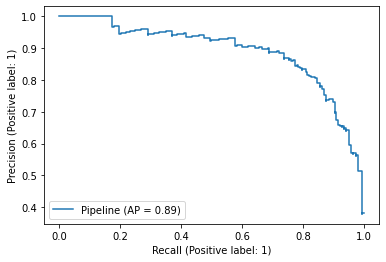

In [36]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df['comment'], y=test_df['toxic'])

In [37]:
np.where(prec > 0.95)

(array([377, 378, 379, 380, 381, 391, 392, 393, 394, 395, 396, 397, 398,
        399, 400, 401, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
        418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
        431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442]),)

In [38]:
thresholds[377]

0.666466672876034

In [39]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[377])

0.953125

In [40]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[377])

0.3630952380952381

In [41]:
grid_pipeline = Pipeline([
                          ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
                          ('model',
                           GridSearchCV(
                               LogisticRegression(random_state=0),
                               param_grid={'C': [0.1, 1, 10]},
                               cv=3,
                               verbose=4
                           )
                          )
])

In [42]:
grid_pipeline.fit(train_df['comment'], train_df['toxic'])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.688 total time=   0.4s
[CV 2/3] END .............................C=0.1;, score=0.687 total time=   0.3s
[CV 3/3] END .............................C=0.1;, score=0.686 total time=   0.4s
[CV 1/3] END ...............................C=1;, score=0.826 total time=   0.6s
[CV 2/3] END ...............................C=1;, score=0.842 total time=   0.6s
[CV 3/3] END ...............................C=1;, score=0.843 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3] END ..............................C=10;, score=0.859 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3] END ..............................C=10;, score=0.870 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3] END ..............................C=10;, score=0.870 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fd493a02c20>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10]}, verbose=4))])

In [43]:
model_pipeline_c_10 = Pipeline([
                           ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
                           ('model', LogisticRegression(random_state=0, C=10))
]
)

In [44]:
model_pipeline_c_10.fit(train_df['comment'], train_df['toxic'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fd48f43da70>)),
                ('model', LogisticRegression(C=10, random_state=0))])

In [46]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=test_df['toxic'], probas_pred=model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1])

In [47]:
 np.where(prec_c_10 > 0.95)

(array([367, 368, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381,
        382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
        395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407,
        408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
        421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433,
        434, 435, 436]),)

In [53]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1] > thresholds[367])

0.8907563025210085

In [51]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1] > thresholds[367])

0.6309523809523809